In [48]:
class Operation():
    
    def __init__(self, input_nodes=[]):
        
        self.input_nodes = input_nodes
        self.output_nodes = []
        
        for node in input_nodes:
            node.output_nodes.append(self)
        
        _default_graph.operations.append(self)
    
    def compute(self):
        
        pass

In [49]:
class add(Operation):
    
    def __init__(self, x, y):
        super().__init__([x, y])
    
    def compute(self, x_var, y_var):
        self.inputs = [x_var, y_var]
        return x_var + y_var

In [50]:
class multiply(Operation):
    
    def __init__(self, x, y):
        super().__init__([x, y])
    
    def compute(self, x_var, y_var):
        self.inputs = [x_var, y_var]
        return x_var * y_var

In [51]:
class matmul(Operation):
    
    def __init__(self, x, y):
        super().__init__([x, y])
    
    def compute(self, x_var, y_var):
        self.inputs = [x_var, y_var]
        return x_var.dot(y_var) 


In [52]:
class Placeholder():
    
    def __init__(self):
        self.output_nodes = []
        _default_graph.placeholders.append(self)

In [53]:
class Variable():
    
    def __init__(self, initial_value=None):
        self.value = initial_value
        self.output_nodes = []
        _default_graph.variables.append(self)

In [54]:
class Graph():
       
    def __init__(self):    
        self.operations = []
        self.placeholders = []
        self.variables = []
        
    def set_as_default(self):
        global _default_graph
        _default_graph = self

In [55]:
g = Graph()
g.set_as_default()
A = Variable(10)
b = Variable(1)
x = Placeholder()
y = multiply(A, x)
z = add(y, b)

In [68]:
def traverse_postorder(operation):
    """ 
    PostOrder Traversal of Nodes. Basically makes sure computations are done in 
    the correct order (Ax first , then Ax + b). Feel free to copy and paste this code.
    It is not super important for understanding the basic fundamentals of deep learning.
    """
    nodes_postorder = []
    def recurse(node):
        if isinstance(node, Operation):
            #print(node.input_nodes)
            for input_node in node.input_nodes:
                #print(input_node)
                recurse(input_node)
        nodes_postorder.append(node)

    #print('Operation is', operation)    
    recurse(operation)
    return nodes_postorder

In [69]:
class Session:
    
    def run(self, operation, feed_dict = {}):
        """ 
          operation: The operation to compute
          feed_dict: Dictionary mapping placeholders to input values (the data)  
        """
        # Puts nodes in correct order
        nodes_postorder = traverse_postorder(operation)    
        for node in nodes_postorder:
            if type(node) == Placeholder:
                node.output = feed_dict[node]
            elif type(node) == Variable:
                node.output = node.value
            else: # Operation
                node.inputs = [input_node.output for input_node in node.input_nodes]
                node.output = node.compute(*node.inputs)
            # Convert lists to numpy arrays
            if type(node.output) == list:
                node.output = np.array(node.output)
        # Return the requested node value
        return operation.output

In [70]:
sess = Session()
result = sess.run(operation=z,feed_dict={x:10})
result

101

In [71]:
class Sigmoid(Operation):
    
    def __init__(self, z):
        # a is the input node
        super().__init__([z])

    def compute(self, z_val):
        return 1/(1+np.exp(-z_val))

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline

In [93]:
data = make_blobs(n_samples=50, n_features=2, centers=2, random_state=75)

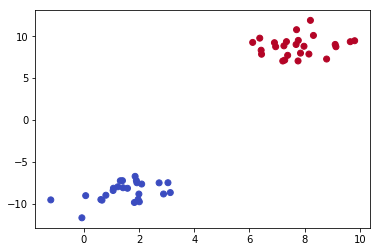

In [94]:
features = data[0]
labels = data[1]
plt.scatter(features[:,0],features[:,1],c=labels, cmap='coolwarm')

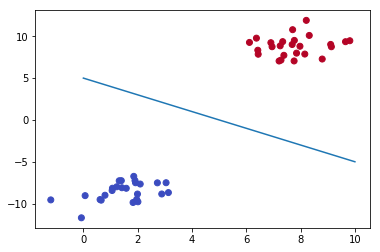

In [97]:
x = np.linspace(0, 10, 100)
y = -x + 5
plt.scatter(features[:,0],features[:,1],c=labels,cmap='coolwarm')
plt.plot(x,y)

In [99]:
g = Graph()
g.set_as_default()
x = Placeholder()
w = Variable([1, 1])
b = Variable([-5])
z = add(matmul(w, x), b)
a = Sigmoid(z)
sess = Session()
sess.run(operation=a,feed_dict={x:[8,10]})

array([ 0.99999774])